## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>...</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>...</li>
    </ul>
</li>
</ul>


In [3]:
import pandas as pd

cars = pd.read_csv('cars.csv')
cars.head()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        804 non-null    float64
 1   Mileage      804 non-null    int64  
 2   Cylinder     804 non-null    int64  
 3   Doors        804 non-null    int64  
 4   Cruise       804 non-null    int64  
 5   Sound        804 non-null    int64  
 6   Leather      804 non-null    int64  
 7   Buick        804 non-null    int64  
 8   Cadillac     804 non-null    int64  
 9   Chevy        804 non-null    int64  
 10  Pontiac      804 non-null    int64  
 11  Saab         804 non-null    int64  
 12  Saturn       804 non-null    int64  
 13  convertible  804 non-null    int64  
 14  coupe        804 non-null    int64  
 15  hatchback    804 non-null    int64  
 16  sedan        804 non-null    int64  
 17  wagon        804 non-null    int64  
dtypes: float64(1), int64(17)
memory usage: 113.2 KB


<h3>Q.0 What is minimum priced car? The maximum priced? What is the lowest, highest, and average mileage? How many rows of data are there? How many columns? Do any of the columns have null values?</h3>

In [5]:
# Put the command (or commands) here to answer the questions above.
#TODO
print(cars.shape) # rows: 804, columns: 18.
print(cars.describe()) # min: 8,638, max: 70,755, low mileage: 266, mean mileage: 19,831, high milage: 50,387. 
print(cars.isnull().values.any()) # no nulls

(804, 18)
              Price       Mileage    Cylinder       Doors      Cruise  \
count    804.000000    804.000000  804.000000  804.000000  804.000000   
mean   21343.143756  19831.934080    5.268657    3.527363    0.752488   
std     9884.852799   8196.319707    1.387531    0.850169    0.431836   
min     8638.930000    266.000000    4.000000    2.000000    0.000000   
25%    14273.075000  14623.500000    4.000000    4.000000    1.000000   
50%    18024.995000  20913.500000    6.000000    4.000000    1.000000   
75%    26717.317500  25213.000000    6.000000    4.000000    1.000000   
max    70755.470000  50387.000000    8.000000    4.000000    1.000000   

            Sound     Leather       Buick    Cadillac       Chevy     Pontiac  \
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000   
mean     0.679104    0.723881    0.099502    0.099502    0.398010    0.186567   
std      0.467111    0.447355    0.299522    0.299522    0.489792    0.389806   
min     

<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

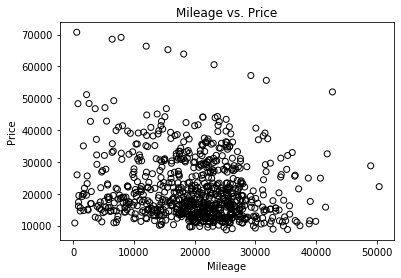

Price         -0.143051
Mileage        1.000000
Cylinder      -0.029461
Doors         -0.016944
Cruise         0.025037
Sound         -0.026146
Leather        0.001005
Buick          0.024193
Cadillac      -0.037472
Chevy         -0.017505
Pontiac       -0.029892
Saab           0.056182
Saturn         0.017467
convertible    0.027436
coupe          0.001510
hatchback     -0.025691
sedan         -0.015905
wagon          0.027016
Name: Mileage, dtype: float64

In [6]:
# Put the command (or commands) here that would give answer to the above question.
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

# plt.scatter(cars['Mileage'], cars['Price'])

fig, ax = plt.subplots()
ax.scatter(cars['Mileage'], cars['Price'], edgecolors = 'k', facecolors = 'none')
ax.set_ylabel('Price')
ax.set_xlabel('Mileage')
ax.set_title('Mileage vs. Price')
plt.show()

cars.corr(method ='pearson')['Mileage']

### Q.1. Comment 
Doesn't seem to be a strong relationship between these two vairables visually. Slight Negative possibly according to the pearson correlation (-0.14).

<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

In [7]:
import numpy as np
import pandas
from pandas import DataFrame, Series
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats 

y = cars['Price']
X = cars['Mileage'] 
X = sm.add_constant(X) # adding constant term

# Linear regression model:
model = sm.OLS(y, X).fit()

# Show summary statistics for the model:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     16.75
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           4.68e-05
Time:                        18:17:58   Log-Likelihood:                -8527.8
No. Observations:                 804   AIC:                         1.706e+04
Df Residuals:                     802   BIC:                         1.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.476e+04    904.363     27.383      0.0

<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [103]:
# Command:
print('Mileage marginal effect on price:', model.params[1])

# One sentence summary:
print("The average car loses $0.17 for every additional mile it has been driven.") 

Mileage marginal effect on price: -0.17252050260202167
The average car loses $0.17 for every additional mile it has been driven.


<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [101]:
# Single command
print('Constant term: ', model.params[0].round())

Constant term:  24765.0


<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

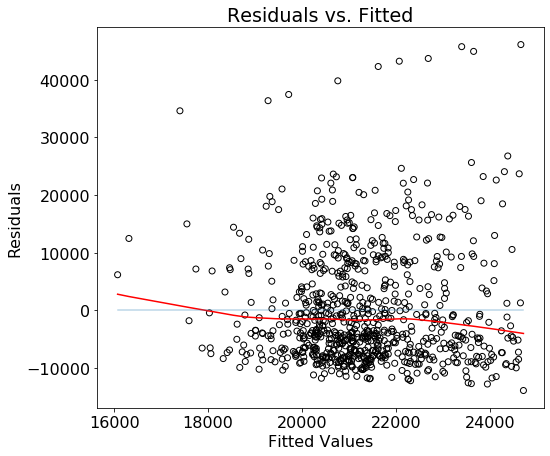

In [99]:
# Plot residuals
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

residuals = model.resid
fitted = model.fittedvalues
smoothed = lowess(residuals,fitted)

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0], alpha = .3)

### Q.5. Comment
There appears to be outliers (that we saw in the inital plot Price-Mileage plot). It looks like there is a slight funnel shape which might indicate heteroskedasticity.  

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

In [98]:
# Commands:
X_2 = cars[['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']]
X_2 = sm.add_constant(X_2) # adding constant term

# Linear regression model:
model_2 = sm.OLS(y, X_2).fit()

# Show summary statistics for the model:
print(model_2.summary())

# residuals plot
# residuals = model_2.resid
# fitted = model_2.fittedvalues
# smoothed = lowess(residuals,fitted)
# plt.rcParams.update({'font.size': 16})
# plt.rcParams["figure.figsize"] = (8,7)
# fig, ax = plt.subplots()
# ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
# ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
# ax.set_ylabel('Residuals')
# ax.set_xlabel('Fitted Values')
# ax.set_title('Residuals vs. Fitted')
# ax.plot([min(fitted),max(fitted)],[0,0], alpha = .3)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     106.8
Date:                Wed, 05 Feb 2020   Prob (F-statistic):           1.23e-98
Time:                        15:20:54   Log-Likelihood:                -8298.9
No. Observations:                 804   AIC:                         1.661e+04
Df Residuals:                     797   BIC:                         1.664e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7323.1646   1770.837      4.135      0.0

### Q.6. Comment
The adjusted R2 went from 0.02 to 0.44 meaning that model is explaining significantly more variance in Price than the mileage only model. All of the additional variables produced statistically significant estimates. 

In [68]:
# from sklearn.preprocessing import StandardScaler
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# scaler = StandardScaler()
# X_3 = scaler.fit_transform(X_2)
# X_3 = pd.DataFrame(X_3)

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X_3.values, i) for i in range(X_3.shape[1])]
# vif["features"] = X_3.columns

# print(X_3.corr())
# print(vif)

# model_3 = sm.OLS(y, X_3).fit()

# # Show summary statistics for the model:
# print(model_3.summary())

<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

In [104]:
# Command(s):

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif["features"] = X_2.columns

# Pearson Correlation
corr = X_2.corr(method ='pearson')

# Eigen value analysis
corr_coef = np.corrcoef(X_2.iloc[:,1:], rowvar=0)
w, v = np.linalg.eig(corr_coef)

print(corr) # no large correlations here
print("Eigen Values: \n",w) # Eigen values are simliar in scale .6-1.4
# print("Eigen Vectors: \n", v)
print(vif) # only the constant is high. 

          const   Mileage  Cylinder     Doors    Cruise     Sound   Leather
const       NaN       NaN       NaN       NaN       NaN       NaN       NaN
Mileage     NaN  1.000000 -0.029461 -0.016944  0.025037 -0.026146  0.001005
Cylinder    NaN -0.029461  1.000000  0.002206  0.354285 -0.089704  0.075520
Doors       NaN -0.016944  0.002206  1.000000 -0.047674 -0.062530 -0.061969
Cruise      NaN  0.025037  0.354285 -0.047674  1.000000 -0.091730 -0.070573
Sound       NaN -0.026146 -0.089704 -0.062530 -0.091730  1.000000  0.165444
Leather     NaN  0.001005  0.075520 -0.061969 -0.070573  0.165444  1.000000
Eigen Values: 
 [1.40284999 0.60350681 1.18776298 1.01797859 0.95515346 0.83274817]
   VIF Factor  features
0   46.202290     const
1    1.003421   Mileage
2    1.167272  Cylinder
3    1.010767     Doors
4    1.164616    Cruise
5    1.045804     Sound
6    1.049990   Leather


### Q.7. Comment
It doesn't appear there are features that are highly colinear (other than the constant). The correlation matrix doesn't show any highly correlated independent variables. The VIF values for all the independent variables are close to 1 indicatingthe absense of colinearity. This despite the warning that the OLS.summary() gave with regard to the cond no., This is likely the result of a scaling issue between mileage and the constant. 

https://stats.stackexchange.com/questions/332483/why-does-matrix-condition-number-change-drastically-when-a-constant-is-added
https://stats.stackexchange.com/questions/332428/regression-model-constant-causes-multicollinearity-warning-but-not-in-standardi

<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [63]:
# chevy = c("Mileage"=30000, "Cylinder"=4, "Doors"=2, "Cruise"=1, "Sound"=1, "Leather"=1)
chevy = [1, 30000, 4, 2, 1, 1, 1]
# Commands that estimate the price of 'chevy' using the model with 6 predictors
chevy_pred = model_2.predict(chevy)

<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [97]:
# Commands
print(chevy_pred[0].round())

19590.0


### Q.9. Comment
The only problem I had was making sure the new 'Chevy' data was in the right format for the predict method so I am assuming I messed something up since you are asking this question. The Chevy appears to be slightly below the average price in the data set as would be expected since the mileage is higher than the average car in this data set.

<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

### Q.10. Comment
I have a fair amount of experience with this model and this type of regression analysis. I have not however done this in Python and have not looked for multicollinearity based on the condition number before. It was really useful to track down why I was having a warning that suggested I had a high level of multicollinearity. Typically I would have scaled all the independent variables in a linear model. I also wasn't clear on if you wanted me to add a constant or not to the model (since the book used a constant in its simple linear model I did as well). This was fun and both this assignment and the knowledge check kept me on my toes. 